**Simple DNN 1 - Getting started**  
Before we move to a more sophisticated ex. we will get familiar with Tensorflow and Keras. We will take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify hand-written digits. The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). The dataset we will use is the MNIST dataset. It's a set of 60,000 training images, plus 10,000 test images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of “solving” MNIST as the “Hello World” of deep learning – it's what you do to verify that your algorithms are working as expected.

In [25]:
import tensorflow

In [26]:
from tensorflow import keras

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:



In [27]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

[TRAIN] Number of examples:  60000
[TEST]  Number of examples:  10000
[TRAIN] Number of labels:  60000
[TEST]  Number of labels:  10000
[TRAIN] Image size:  (28, 28)
[TEST]  Image size:  (28, 28)


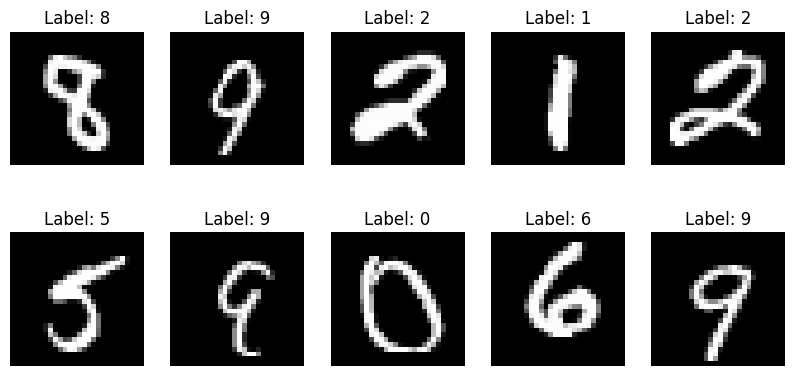

In [28]:
# Task 1 Please check the number of training and testing example.
print("[TRAIN] Number of examples: ", len(train_images))
print("[TEST]  Number of examples: ", len(test_images))

# Task 2 How many labels do we have?
print("[TRAIN] Number of labels: ", len(train_labels))
print("[TEST]  Number of labels: ", len(test_labels))

# Task 3 Check the image size and plot few examples
print("[TRAIN] Image size: ", train_images[0].shape)
print("[TEST]  Image size: ", test_images[0].shape)

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 10))
for i in range(10):
    rand_index = np.random.randint(0, len(train_images))
    plt.subplot(4, 5, i+1)
    plt.imshow(train_images[rand_index], cmap='gray')
    plt.title("Label: {}".format(train_labels[rand_index]))
    plt.axis('off')
plt.show()

**DNN workflow**
1. Build the neural network architecture.
2. Train our neural network with the training data, train_images and train_labels. The network will then learn to associate images and labels.
3. The network will produce predictions for test_images, and we will verify if these predictions match the labels from test_labels.

**DNN architecture**
1. Our network will consist of a sequence of two Dense layers, which are densely-connected (also called “fully-connected”) neural layers.
2. The second (and last) layer is a 10-way “softmax” layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

**DNN training**  
To make our network ready for training, we need to pick three more things, as part of the “compilation” step:
1. A **loss function**: This is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
2. An **optimizer**: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
3. **Metrics**: to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

**Network architecture**

In [29]:
from keras import models
from keras import layers
 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

**Network Training**  
Once the model architecture is defined, the learning process can be configured in the compilation step. We specify the optimizer, loss function, and metrics.

In [30]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

**Data preparation**  
Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the [0, 1] interval. Our training images are being stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. Please transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.
Necessary functions: reshape and astype.
Perform it for both train and test examples.

In [31]:
#TODO: reshape and transform the data
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

Because of we use categorical_crossentropy loss function we need to convert data format:

In [32]:
from keras.utils import to_categorical
 
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

**Fit the model**  
To train the network we call the fit method of the network with parameters epochs and batch_size. Set epochs to 5, and batch_size to 128.

In [33]:
epoch = 5
batch_size = 128

#TODO: fit the model
model_fit = network.fit(train_images, train_labels, epochs=epoch, batch_size=batch_size)

Epoch 1/5
469/469 [==============================] - 2s 4ms/step - loss: 0.2619 - accuracy: 0.9246
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.1071 - accuracy: 0.9689
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0712 - accuracy: 0.9783
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0509 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0385 - accuracy: 0.9885


**Network evaluation**  
Two quantities are being displayed during training: the “loss” of the network over the training data, and the accuracy of the network over the training data. We quickly reach an accuracy of 0.989 (i.e. 98.9%) on the training data. Now let's check that our model performs well on the test set too:

In [35]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)
print ("test_loss:", test_loss)

313/313 [==============================] - 1s 2ms/step - loss: 0.0628 - accuracy: 0.9809
test_acc: 0.98089998960495
test_loss: 0.06283566355705261


Our test set accuracy turns out to be 98.1% – that's quite a bit lower than the training set accuracy.
This gap between training accuracy and test accuracy is an example of “overfitting”, the fact that machine learning models tend to perform worse on new data than on their training data.